# Бустинг и ансамбли в аналитике

В этом ноутбуке мы рассмотрим:
- Что такое ансамбли моделей
- Принцип работы бустинга
- Популярные библиотеки: XGBoost, LightGBM, CatBoost
- Пример прогнозирования оттока клиентов
- Метрики качества
- Задания для самостоятельной практики

## 1. Принцип работы ансамблей
Ансамбли — это подход, при котором мы объединяем несколько моделей для повышения качества предсказаний.

**Основная идея:**
- Несколько слабых моделей (weak learners) объединяются в одну сильную (strong learner)
- Ошибки одних моделей компенсируются успехами других

### Виды ансамблей:
1. **Бэггинг** (Bootstrap Aggregating) — модели обучаются параллельно на случайных подвыборках данных (пример: Random Forest)
2. **Бустинг** — модели обучаются последовательно, каждая новая модель исправляет ошибки предыдущих (пример: XGBoost, LightGBM, CatBoost)
3. **Стэкинг** — объединяем предсказания разных моделей через метамодель

## 2. Бустинг: принцип работы
Бустинг (Boosting) — это метод последовательного построения моделей, где каждая следующая модель старается лучше предсказывать те объекты, на которых предыдущие ошибались.

Примерно это можно представить как **учителя**, который сначала объяснил тему всем, потом проверил ошибки и отдельно поработал с теми, кто не понял.

## 3. Популярные библиотеки
**XGBoost**
- Оптимизированная реализация градиентного бустинга
- Быстрая и эффективная

**LightGBM**
- От Microsoft
- Использует алгоритм GOSS и построение дерева по листьям
- Очень быстрый на больших данных

**CatBoost**
- От Яндекса
- Отлично работает с категориальными признаками
- Не требует One-Hot кодирования

In [1]:
# Установка библиотек (раскомментируйте при первом запуске)
# !pip install xgboost lightgbm catboost scikit-learn matplotlib pandas

## 4. Пример: прогнозирование оттока клиентов
Будем использовать искусственный набор данных, имитирующий информацию о клиентах и их уходе.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Генерируем искусственные данные
np.random.seed(42)
data = pd.DataFrame({
    'age': np.random.randint(18, 70, 500),  # возраст клиента
    'balance': np.random.randint(0, 200000, 500),  # баланс на счете
    'transactions': np.random.randint(1, 100, 500),  # количество транзакций
    'is_active': np.random.randint(0, 2, 500),  # активность (0 = нет, 1 = да)
    'churn': np.random.randint(0, 2, 500)  # отток (0 = остался, 1 = ушел)
})

X = data.drop('churn', axis=1)  # признаки
y = data['churn']  # целевая переменная

# Разделяем на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### XGBoost

In [3]:
from xgboost import XGBClassifier

# Создаем модель XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)  # обучение модели

# Предсказания
y_pred_xgb = xgb_model.predict(X_test)

# Оценка
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.47333333333333333
              precision    recall  f1-score   support

           0       0.44      0.44      0.44        71
           1       0.50      0.51      0.50        79

    accuracy                           0.47       150
   macro avg       0.47      0.47      0.47       150
weighted avg       0.47      0.47      0.47       150



c:\Users\maksi\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:02:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### LightGBM

In [4]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 183, number of negative: 167
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 241
[LightGBM] [Info] Number of data points in the train set: 350, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.522857 -> initscore=0.091492
[LightGBM] [Info] Start training from score 0.091492
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

### CatBoost

In [5]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

CatBoost Accuracy: 0.5133333333333333
              precision    recall  f1-score   support

           0       0.48      0.37      0.42        71
           1       0.53      0.65      0.58        79

    accuracy                           0.51       150
   macro avg       0.51      0.51      0.50       150
weighted avg       0.51      0.51      0.50       150



## 5. Сравнение результатов
После обучения всех моделей можно сравнить их точность и выбрать лучшую.

      Model  Accuracy
0   XGBoost  0.473333
1  LightGBM  0.540000
2  CatBoost  0.513333


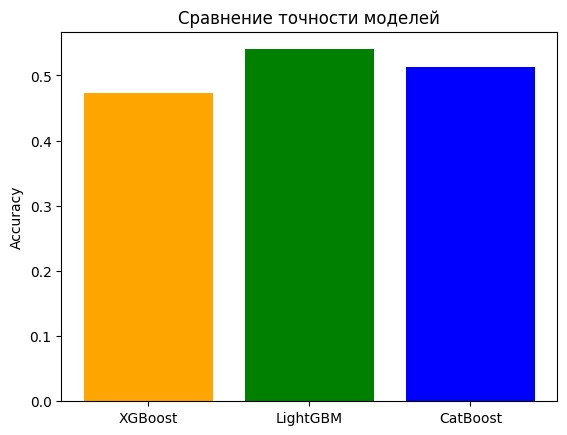

In [6]:
models_results = pd.DataFrame({
    'Model': ['XGBoost', 'LightGBM', 'CatBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_lgb),
        accuracy_score(y_test, y_pred_cat)
    ]
})

print(models_results)

plt.bar(models_results['Model'], models_results['Accuracy'], color=['orange', 'green', 'blue'])
plt.ylabel('Accuracy')
plt.title('Сравнение точности моделей')
plt.show()

## 6. Задания для практики
1. Объясните разницу между бэггингом и бустингом.
2. Обучите XGBoost с разными значениями `max_depth` и сравните точность.
3. Реализуйте LightGBM с параметром `num_leaves=31` и оцените метрики.
4. Проверьте, как CatBoost работает с категориальными признаками.
5. Постройте график важности признаков (feature importance) для одной из моделей.